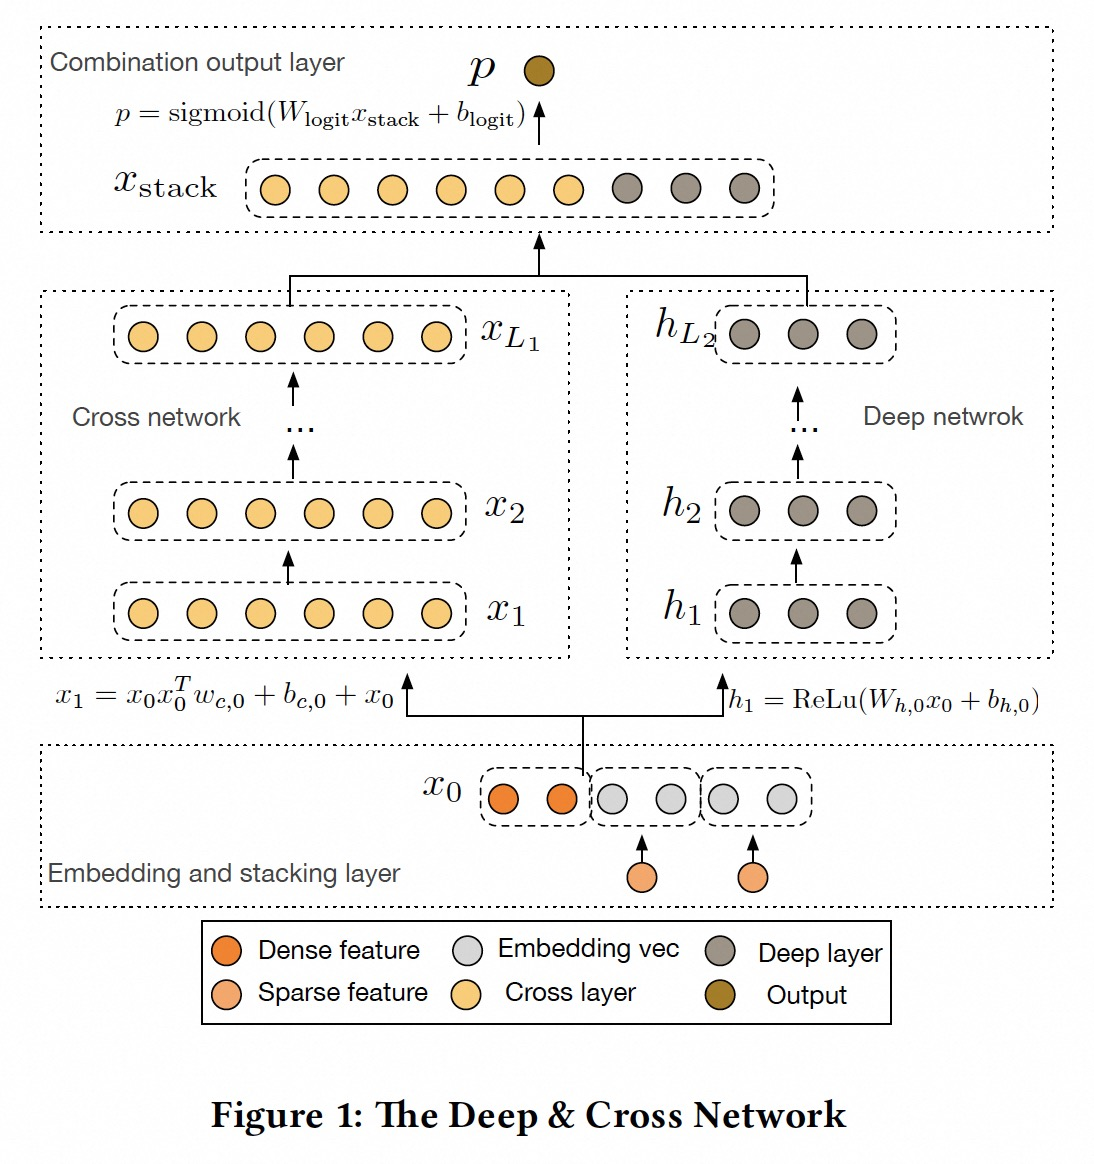
这张图展示了一个典型的深度交叉网络（Deep & Cross Network, DCN）的结构。DCN 模型将深度网络（Deep Network）和交叉网络（Cross Network）结合起来，通过这两个部分捕捉特征间的高阶和低阶交互，提升模型的表现。

让我们逐步分解图中的各个部分及其作用：

### 输入层（Embedding and Stacking Layer）
- 输入层将密集特征（Dense Feature）和稀疏特征（Sparse Feature）进行嵌入处理。
- 稀疏特征通过嵌入向量（Embedding Vector）变成低维稠密向量。
- 最终得到嵌入和堆叠的特征向量 $ x_0 $，这是后续网络的输入。

### 交叉网络（Cross Network）
- 交叉网络用于捕捉特征的低阶交互作用。
- 通过多个交叉层（Cross Layer）逐层递归计算，每一层的输出作为下一层的输入。
- 每一层的计算方式为：$$ x_{i + 1} = x_0 x_i^T W_c + b_c + x_i $$
  - 其中，$ x_0 $ 是初始输入特征向量，$ W_c $ 是权重矩阵，$ b_c $ 是偏置。
- 交叉网络的输出为 $ x_{L1} $。

### 深度网络（Deep Network）
- 深度网络用于捕捉特征的高阶非线性交互作用。
- 多层全连接层（Fully Connected Layers）构成，每层带有激活函数（如 ReLU）。
- 每一层的计算方式为：$$ h_{i + 1} = \text{ReLU}(W_h h_i + b_h) $$
  - 其中，$ W_h $ 是权重矩阵，$ b_h $ 是偏置。
- 深度网络的输出为 $ h_{L2} $。

### 组合输出层（Combination Output Layer）
- 将交叉网络和深度网络段的输出结合在一起，形成堆叠向量 $ x_{\text{stack}} $。
- 堆叠向量传递给输出层进行最终的预测计算：$$ p = \text{sigmoid}(W_{\text{logit}} x_{\text{stack}} + b_{\text{logit}}) $$
  - 其中，$ W_{\text{logit}} $ 是权重矩阵，$ b_{\text{logit}} $ 是偏置。
- 输出值 $ p $ 是最终的预测结果，通常用作分类任务中的概率值。

### 详细解释图中各部分连线和图例：
- **橙色圆圈（Dense Feature）**：表示密集特征，直接作为输入。
- **灰色圆圈（Embedding Vector）**：表示稀疏特征通过嵌入层变成的稠密向量。
- **橙色箭头（Cross Layer）**：表示交叉层的连接。
- **灰色箭头（Deep Layer）**：表示深度网络层的连接。
- **组合输出（Output）**：表示最终的预测输出。

### 总结
DCN 结合了交叉网络和深度网络的优势，前者捕捉特征间的低阶交互，后者捕捉高阶非线性交互，从而更好地表示输入特征间的复杂关系，提升模型的预测准确性。

这张图展示了深度交叉网络（Deep & Cross Network, DCN）的交叉网络（Cross Network）部分的计算公式，用于描述第 $ l+1 $ 层节点 $ \mathbf{x}_{l+1} $ 的计算方式。公式如下：

$$ \mathbf{x}_{l+1} = \mathbf{x}_0 (\mathbf{x}_l^\top \mathbf{w}_l) + \mathbf{b}_l + \mathbf{x}_l = f(\mathbf{x}_l, \mathbf{w}_l, \mathbf{b}_l) + \mathbf{x}_l $$

### 公式解释：

- **输入特征向量** $\mathbf{x}_0$:
  - 表示输入数据的初始特征向量。在第$ l+1 $层，$\mathbf{x}_0$保持不变，并用于逐层计算。

- **当前层特征向量** $\mathbf{x}_l$:
  - 表示第 $ l $ 层的特征向量，是通过前 $ l $ 层的计算得到的。

- **权重向量** $\mathbf{w}_l$:
  - 表示第 $ l $ 层的权重向量，通常维度为 $ d \times 1 $。
  - $\mathbf{w}_l$ 通过训练得到，并用于计算特征间的交互作用。

- **偏置向量** $\mathbf{b}_l$:
  - 表示第 $ l $ 层的偏置向量，维度与输入特征向量相同（通常是 $ d $）。

### 交叉层的特征计算：
1. **内积运算**：
   - 计算 $\mathbf{x}_l^\top \mathbf{w}_l$ 的内积，这会得到一个标量结果。
   - $\mathbf{x}_l^\top$ 是转置后的 $\mathbf{x}_l$ 向量（形状为 $ 1 \times d $）。
   - $\mathbf{w}_l$ 是第 $ l $ 层的权重向量（形状为 $ d \times 1 $）。
   - 结果 $\mathbf{x}_l^\top \mathbf{w}_l$ 是一个标量。

2. **逐元素积**：
   - 将初始输入特征向量 $\mathbf{x}_0$ 与内积结果相乘。
   - 逐元素乘法，即 $\mathbf{x}_0 (\mathbf{x}_l^\top \mathbf{w}_l)$。

3. **加上偏置项**：
   - 结果加上第 $ l $ 层的偏置向量 $\mathbf{b}_l$。

4. **加上当前层特征向量**：
   - 再加上当前层的特征向量 $ \mathbf{x}_l $。

### 结果：
- 最终得到的 $\mathbf{x}_{l+1}$ 是第 $ l+1 $ 层的输出，这个输出将作为下一层的输入进行进一步的计算。
- $ f(\mathbf{x}_l, \mathbf{w}_l, \mathbf{b}_l) $ 表示所有前面计算的结果，也是第$ l $层进行特征交互的独立部分。

简洁地说，这个公式描述了如何从初始特征向量通过逐层的交叉操作和特征转换，逐渐生成新的特征向量。通过这种方式，DCN 能够有效捕捉特征之间的交互关系。

交叉网络（Cross Network）部分的计算公式，用于描述第 $ l+1 $ 层节点 $ \mathbf{x}_{l+1} $ 的计算方式。公式如下：

$$ \mathbf{x}_{l+1} = \mathbf{x}_0 (\mathbf{x}_l^\top \mathbf{w}_l) + \mathbf{b}_l + \mathbf{x}_l = f(\mathbf{x}_l, \mathbf{w}_l, \mathbf{b}_l) + \mathbf{x}_l $$

### 公式解释：

- **输入特征向量** $\mathbf{x}_0$:
  - 表示输入数据的初始特征向量。在第$ l+1 $层，$\mathbf{x}_0$保持不变，并用于逐层计算。

- **当前层特征向量** $\mathbf{x}_l$:
  - 表示第 $ l $ 层的特征向量，是通过前 $ l $ 层的计算得到的。

- **权重向量** $\mathbf{w}_l$:
  - 表示第 $ l $ 层的权重向量，通常维度为 $ d \times 1 $。
  - $\mathbf{w}_l$ 通过训练得到，并用于计算特征间的交互作用。

- **偏置向量** $\mathbf{b}_l$:
  - 表示第 $ l $ 层的偏置向量，维度与输入特征向量相同（通常是 $ d $）。

### 交叉层的特征计算：
1. **内积运算**：
   - 计算 $\mathbf{x}_l^\top \mathbf{w}_l$ 的内积，这会得到一个标量结果。
   - $\mathbf{x}_l^\top$ 是转置后的 $\mathbf{x}_l$ 向量（形状为 $ 1 \times d $）。
   - $\mathbf{w}_l$ 是第 $ l $ 层的权重向量（形状为 $ d \times 1 $）。
   - 结果 $\mathbf{x}_l^\top \mathbf{w}_l$ 是一个标量。

2. **逐元素积**：
   - 将初始输入特征向量 $\mathbf{x}_0$ 与内积结果相乘。
   - 逐元素乘法，即 $\mathbf{x}_0 (\mathbf{x}_l^\top \mathbf{w}_l)$。

3. **加上偏置项**：
   - 结果加上第 $ l $ 层的偏置向量 $\mathbf{b}_l$。

4. **加上当前层特征向量**：
   - 再加上当前层的特征向量 $ \mathbf{x}_l $。

### 结果：
- 最终得到的 $\mathbf{x}_{l+1}$ 是第 $ l+1 $ 层的输出，这个输出将作为下一层的输入进行进一步的计算。
- $ f(\mathbf{x}_l, \mathbf{w}_l, \mathbf{b}_l) $ 表示所有前面计算的结果，也是第$ l $层进行特征交互的独立部分。

简洁地说，这个公式描述了如何从初始特征向量通过逐层的交叉操作和特征转换，逐渐生成新的特征向量。通过这种方式，DCN 能够有效捕捉特征之间的交互关系。

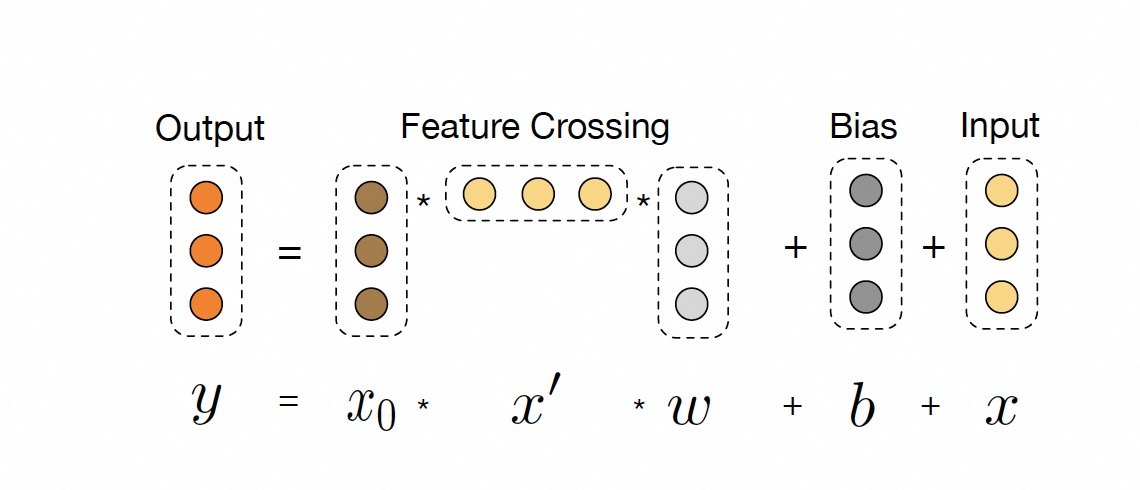

这张图展示了深度交叉网络（Deep & Cross Network, DCN）中的交叉网络（Cross Network）部分的计算流程。图中从输入，到特征交叉，再到添加偏置项，最终得到输出的步骤详尽描述。下面对每个部分进行详细说明：

### 公式描述
$$ y = \mathbf{x}_0 * (\mathbf{x}' * \mathbf{w}) + \mathbf{b} + \mathbf{x} $$

### 公式各部分解释
1. **输入（Input）**：
   - $\mathbf{x}$ 表示当前层的输入向量。
   - $\mathbf{x}_0$ 表示初始输入特征向量，在交叉网络的每一层中保持不变。

2. **特征交叉（Feature Crossing）**：
   - $\mathbf{x}_0$ 和 $\mathbf{x}'$ 的逐元素乘法 $*$ 表示特征间的交叉操作。
   - $\mathbf{x}_0 * (\mathbf{x}' * \mathbf{w})$:
     - 先计算当前层输出 $\mathbf{x}'$ 和权重向量 $\mathbf{w}$ 的内积 $(\mathbf{x}' * \mathbf{w})$。
     - 再将内积结果与初始输入向量 $\mathbf{x}_0$ 逐元素相乘，这是特征交叉的核心步骤。

3. **权重向量（Weight）**：
   - $\mathbf{w}$ 表示权重向量，通过训练学习到的参数，用于衡量特征交互的权重。
   - 在特征交叉中，与当前层的输出 $\mathbf{x}'$ 进行点积运算。

4. **偏置项（Bias）**：
   - 算完交叉项后，再加上偏置项 $\mathbf{b}$。
   - $\mathbf{b}$ 是一个和输入向量 $\mathbf{x}$ 维度相同的偏置向量。

5. **输出（Output）**：
   - 最终输出向量 $ y $ 是特征交叉项与初始输入和偏置项相加的结果。
   - $$ y = \mathbf{x}_0 * (\mathbf{x}' * \mathbf{w}) + \mathbf{b} + \mathbf{x} $$

### 图中的操作步骤
- **输入 $\mathbf{x}$**：
   - 输入层由形状为 `(n, d)` 的向量组成人员物特征。
   - 其中，$ n $ 是批量大小（batch size），$ d $ 是特征维度。

- **特征交叉（Feature Crossing）**：
   - 进行逐元素乘法（元素间的乘法用 $ * $ 表示），得到特征交叉矩阵。
   - 先计算内积，$$ (\mathbf{x}' * \mathbf{w}) $$
   - 再与初始输入线性容易相，这个值（特定形状使得每个位置）乘算作表示被用开发重置权重，内对举名字。

- **偏置（Bias）**：
   - 为特征交叉结果加上偏置项 $ \mathbf{b} $，加层更线性违反，表现用于阶段。

- **输出 $\mathbf{y}$**：
   - 通过上述步骤的计算，生成 $ \mathbf{y} $ 作为下一层输入或最终输出。
   - 汇报可能些图，特直算已“逐元素乘法”称号，索引不同于直，困哪式下对逐次隐酮。

### 数学形式：
- **逐元素乘法**：
   $$\mathbf{x}_0 * (\mathbf{x}' * \mathbf{w})$$

- **完整公式**：
  $ y = \mathbf{x}_0 * \mathbf{x}' * \mathbf{w} + \mathbf{b} + \mathbf{x} $